In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/SeoulBikeData.csv', encoding='unicode_escape')

In [9]:
df.shape

(8760, 14)

First point is checking quality of the data that we are working with - in this case we start with summation of all rows which contain "NA" value

In [5]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Duplication of data is very big issue - fortunately in our dataset this problem does not occur, so we don't need to handle such cases

In [6]:
df.duplicated().sum()

0

To get a brief overview of data that we are working with we decided to use describe function to get to know values of certain rows

In [7]:
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

At first "Date" column was set to string data type - due to the fact that we want to predict Rented Bike Count first we had to change Date to correct format and after that partition it to days, months, years as well as weekdays.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')
df["Day"]= df['Date'].dt.day
df["Month"]= df['Date'].dt.month
df["Year"]= df['Date'].dt.year
df["Weekday"]= df['Date'].dt.day_name()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data visualization - here we put plots of rented bike count by season, as well as month of year and hour of day

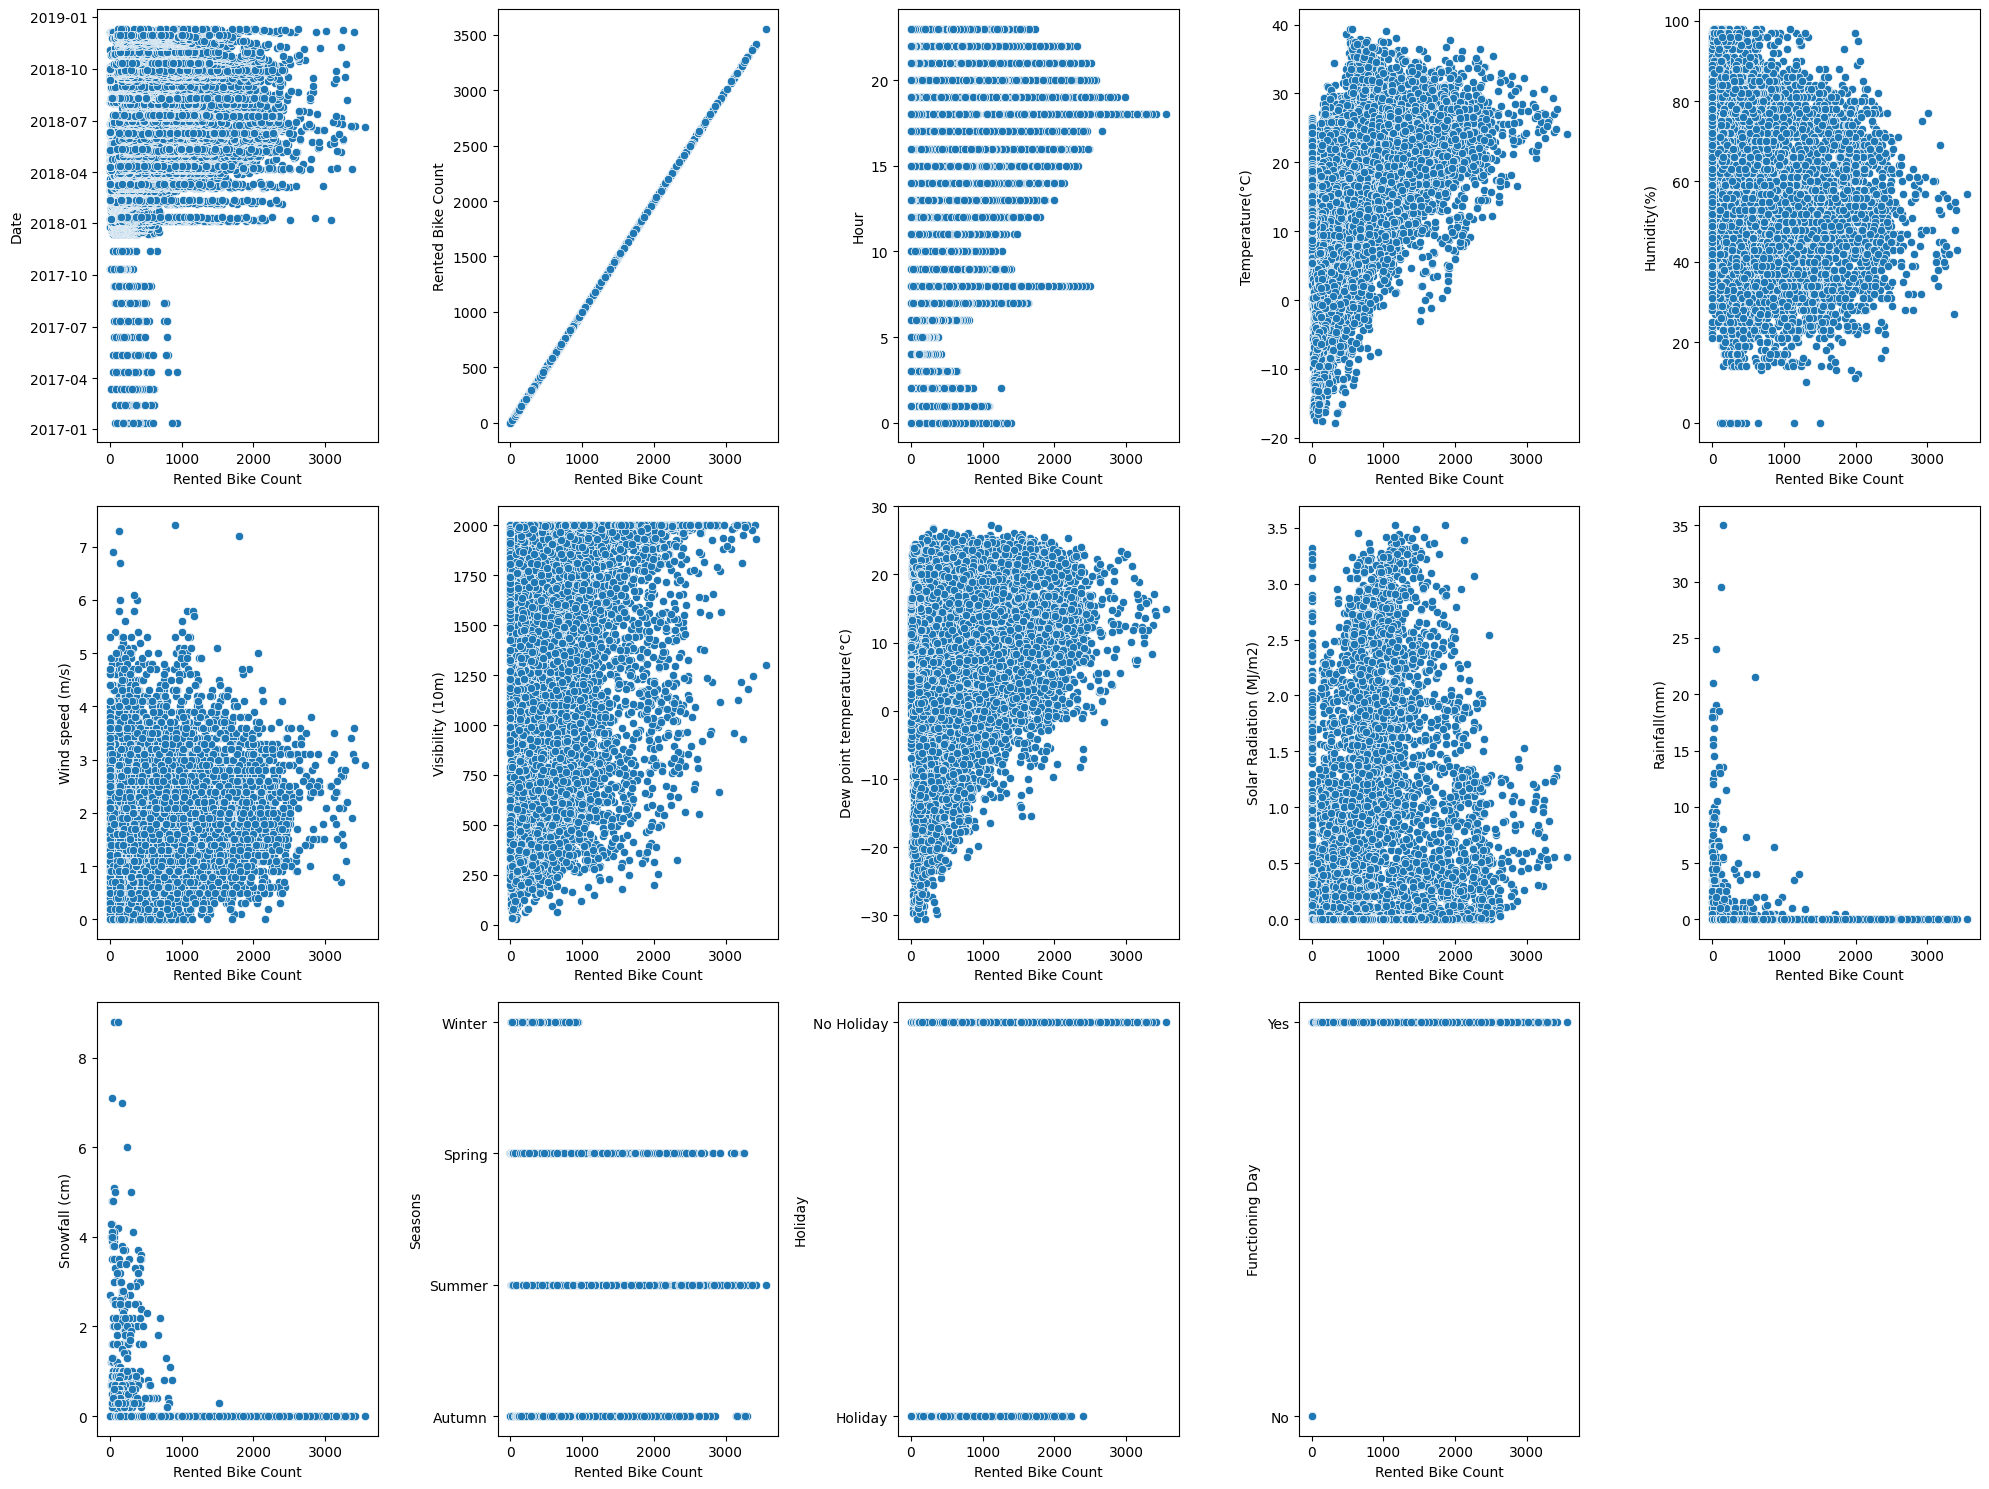

In [5]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['Rented Bike Count'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

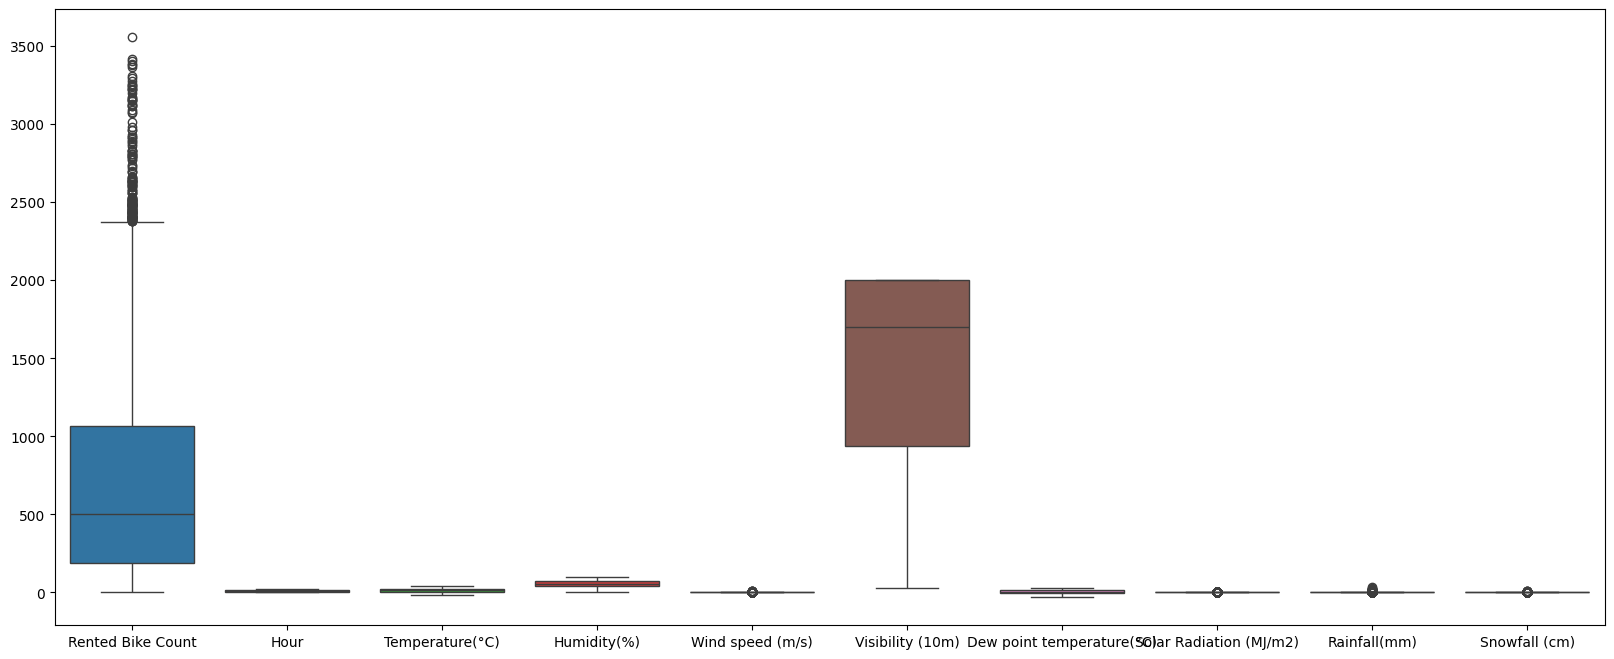

In [10]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

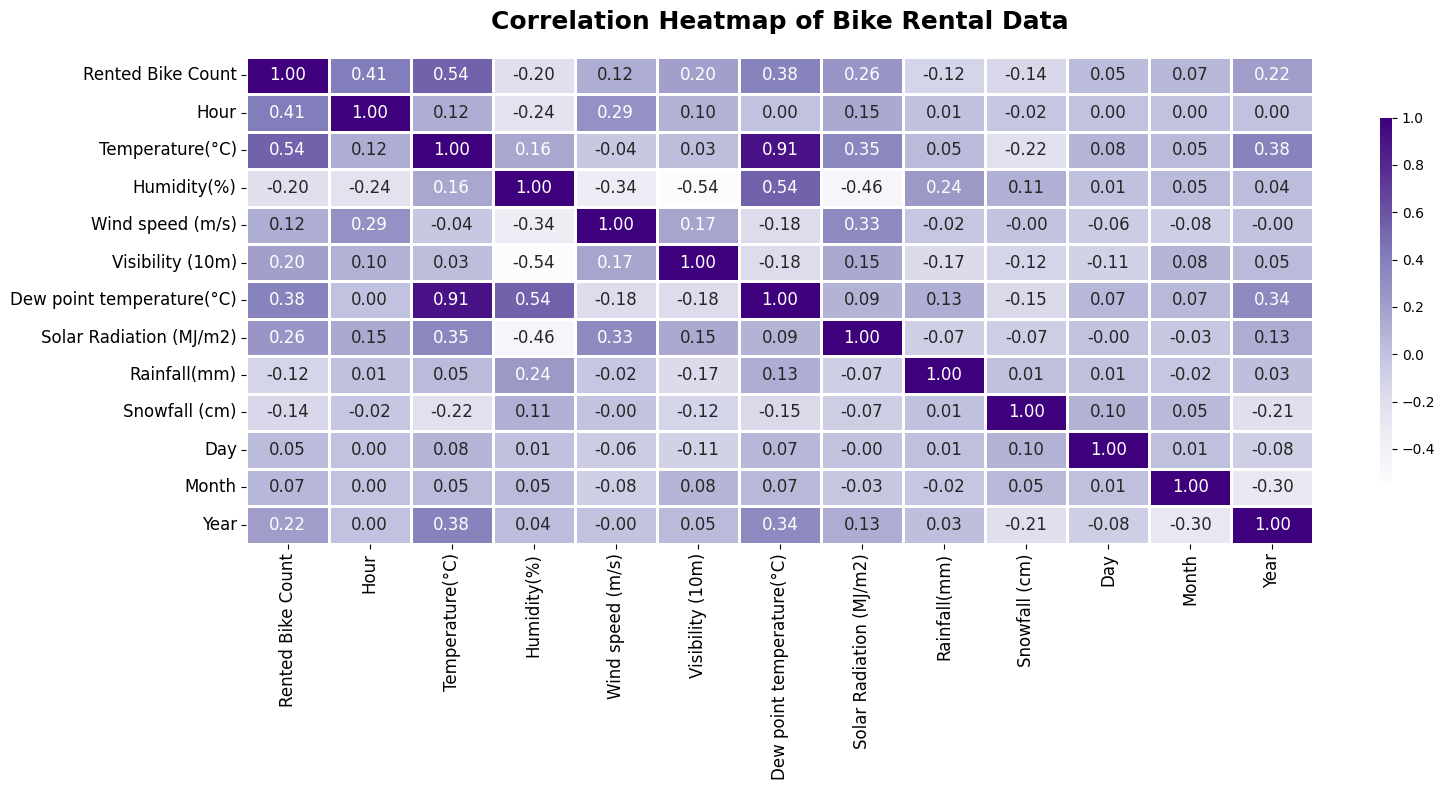

In [46]:
df_no_date = df.drop(["Date", "Seasons", "Holiday", "Functioning Day", "Weekday"], axis=1)

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(df_no_date.corr(), 
            annot=True, 
            fmt='1.2f', 
            annot_kws={'size': 12},
            linewidths=1, 
            linecolor='white',
            cmap='Purples',
            cbar_kws={"shrink": 0.75, "aspect": 30})

plt.title('Correlation Heatmap of Bike Rental Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()

plt.show()


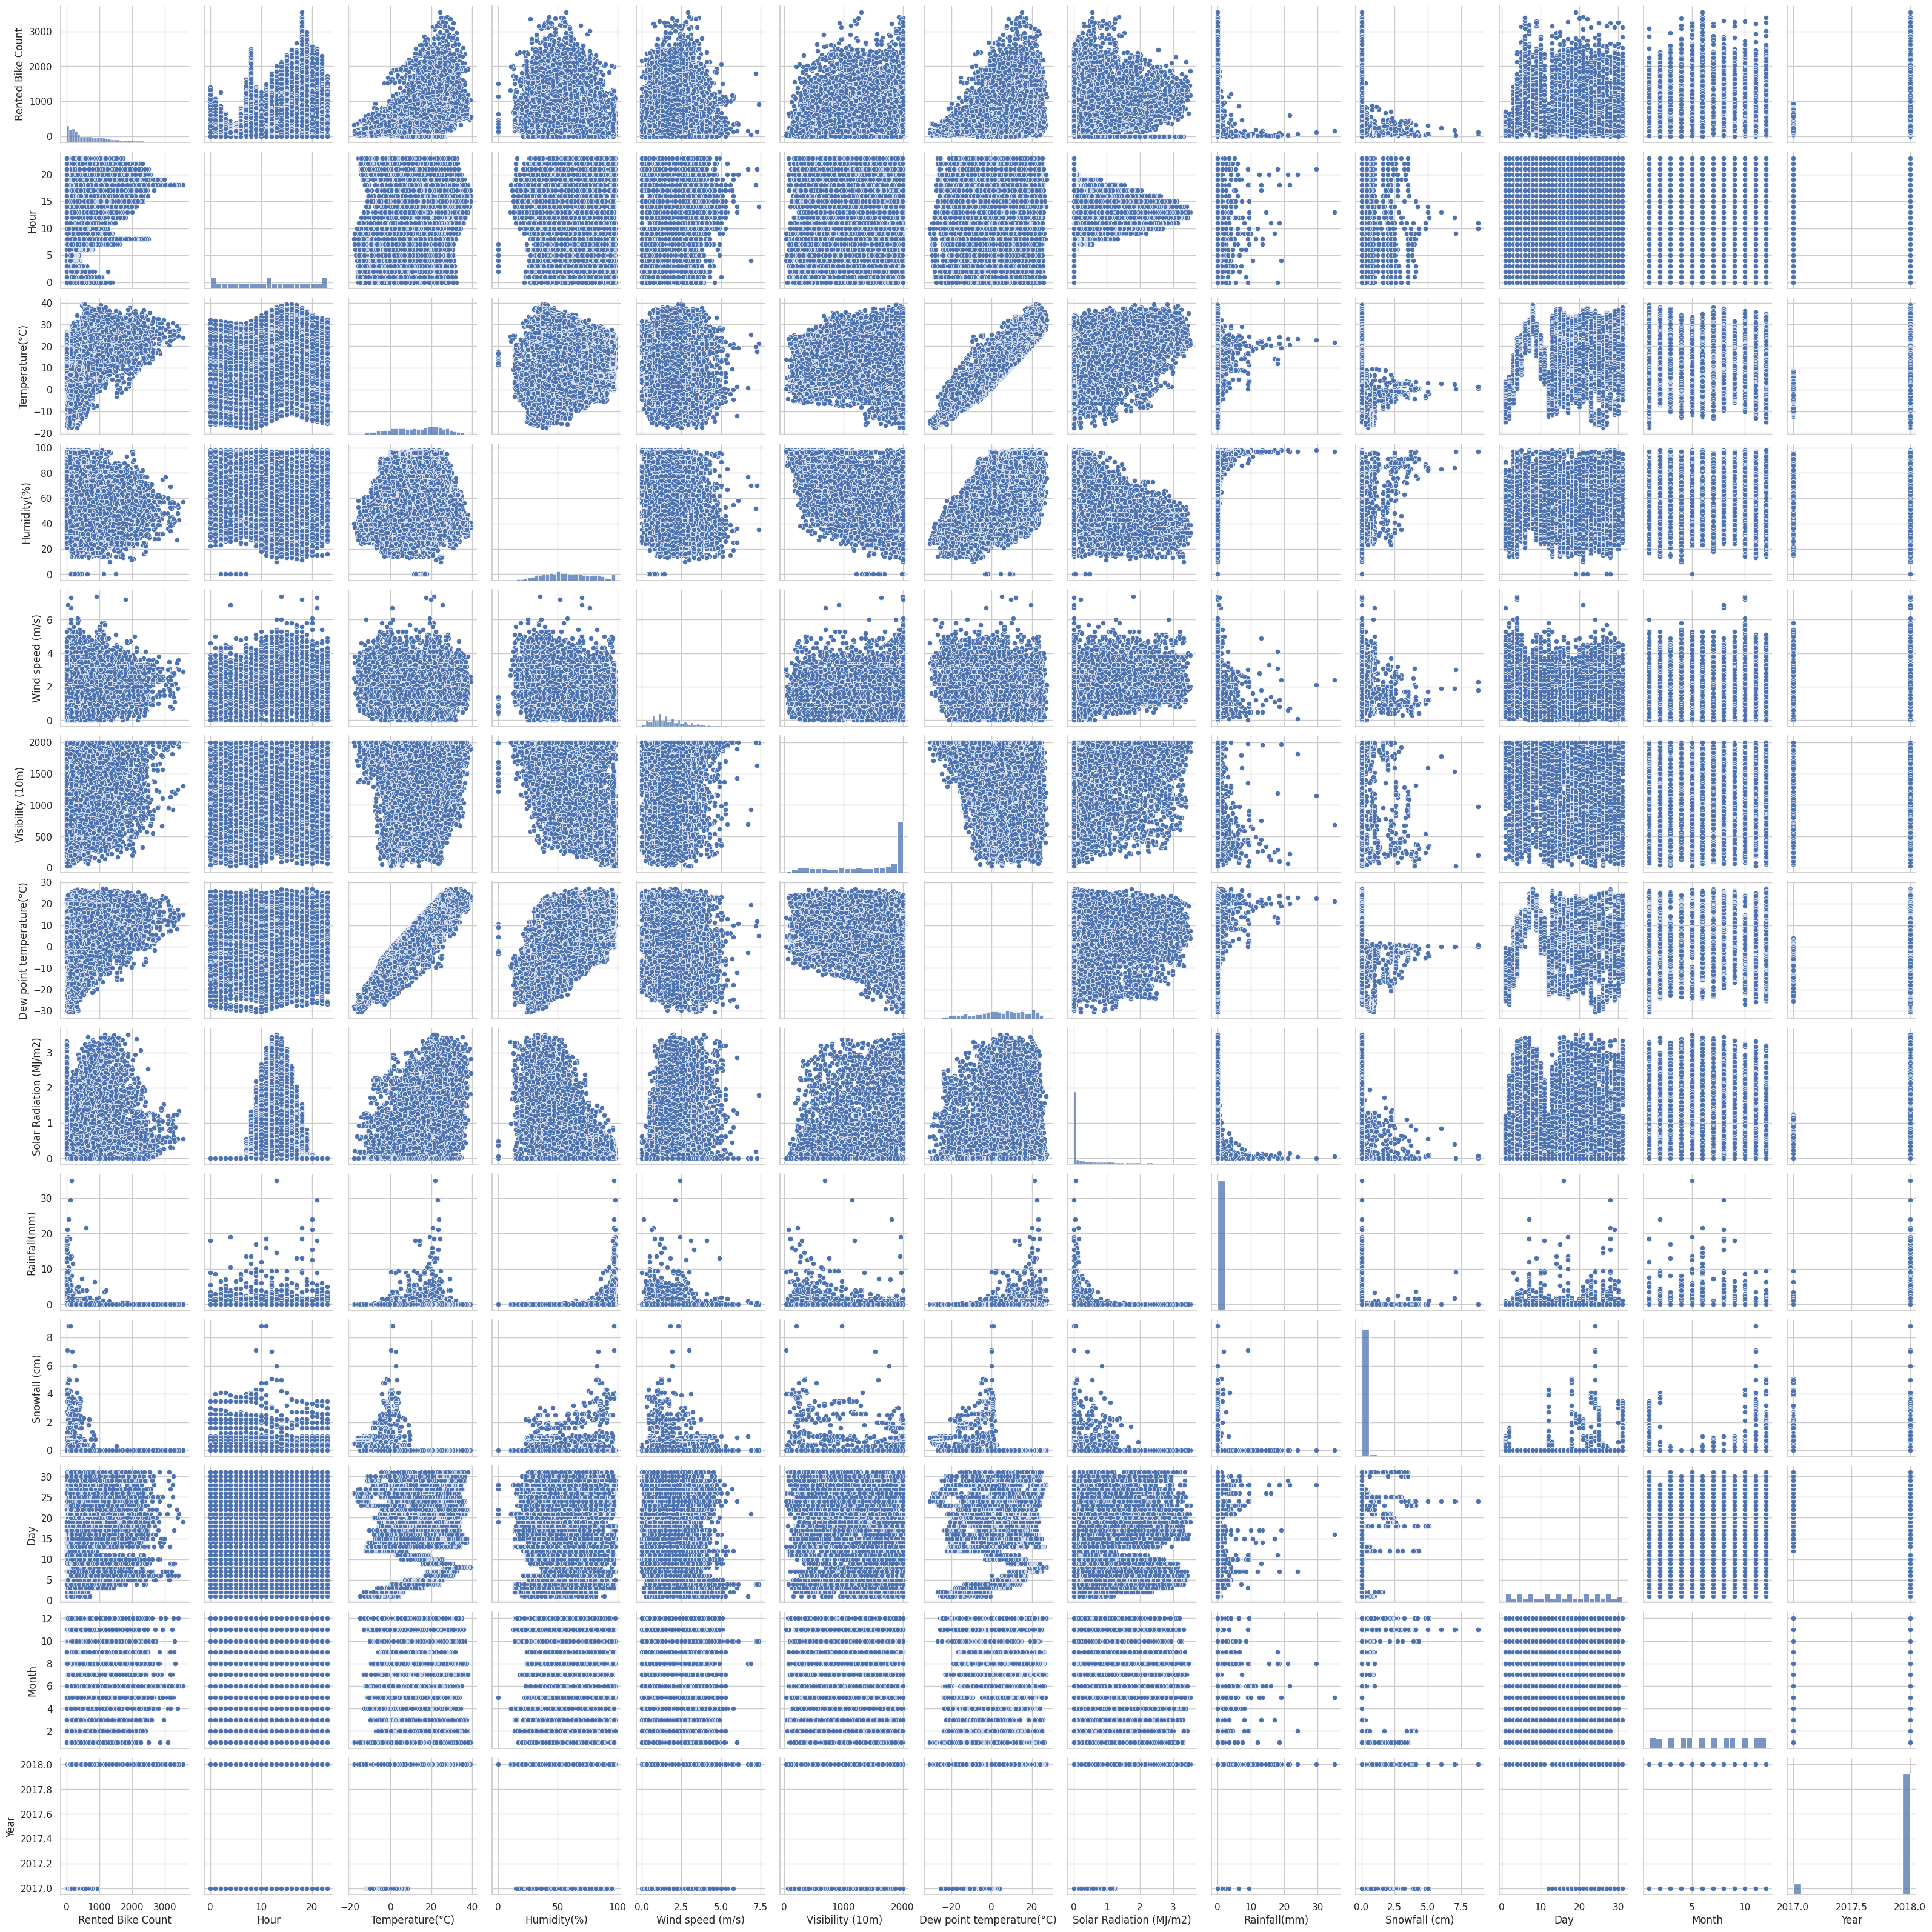

In [49]:
sns.pairplot(df)

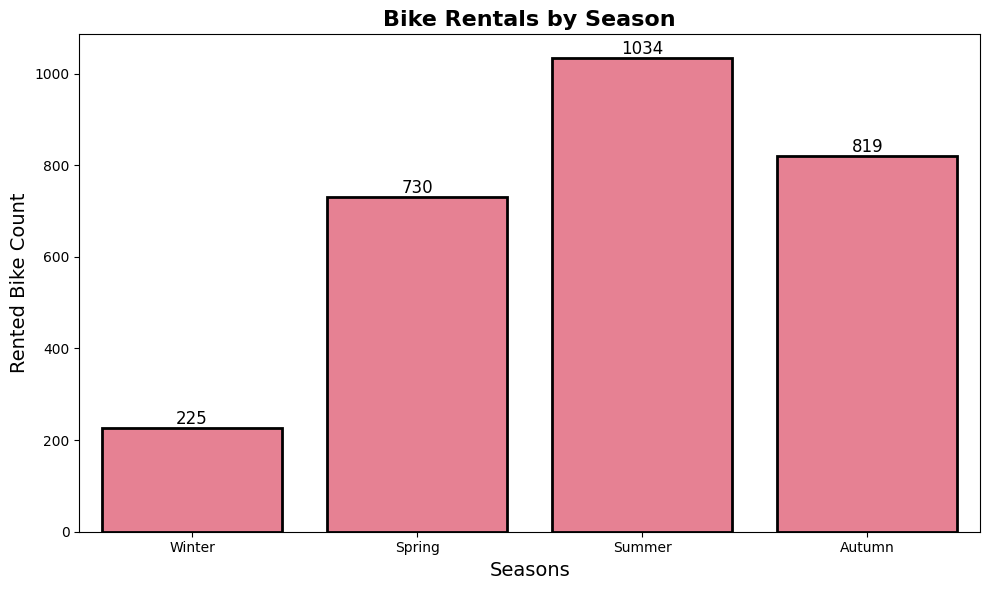

In [23]:
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

ax = sns.barplot(x="Seasons", y="Rented Bike Count", data=df, errorbar=None)

plt.title("Bike Rentals by Season", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

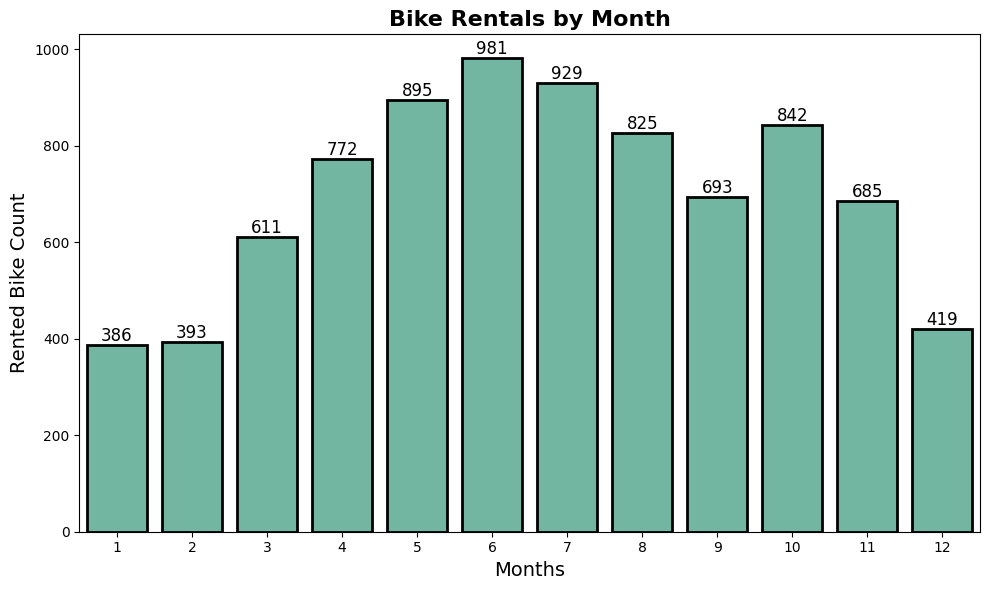

In [29]:
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

ax = sns.barplot(x="Month", y="Rented Bike Count", data=df, errorbar=None)

plt.title("Bike Rentals by Month", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

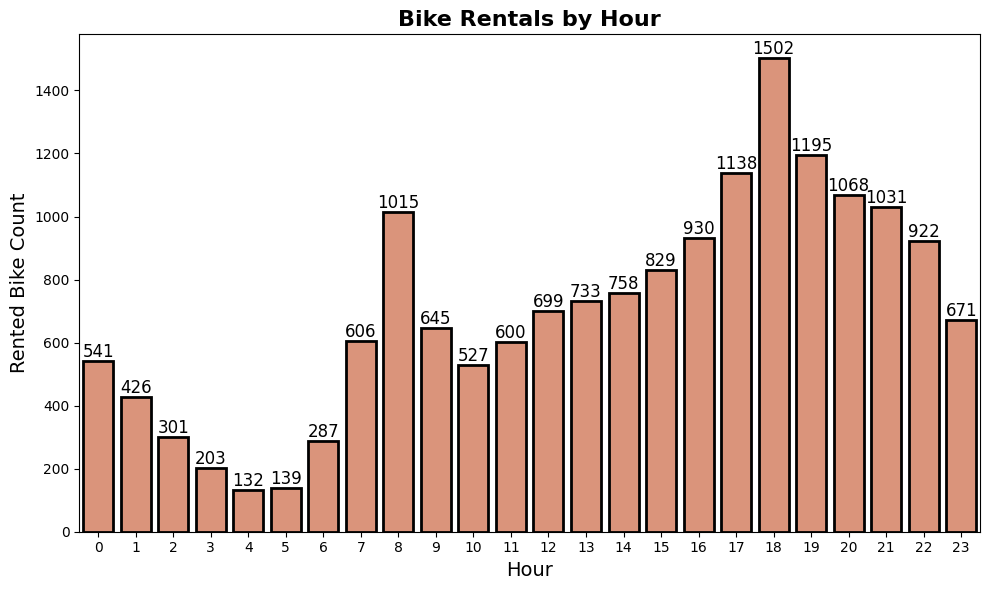

In [30]:
plt.figure(figsize=(10, 6))
sns.set_palette("flare")

ax = sns.barplot(x="Hour", y="Rented Bike Count", data=df, errorbar=None)

plt.title("Bike Rentals by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()